# Coursera Capstone Project 
#### Exploring the Neighborhoods of Toronto & NewYork City
<p>This Notebook is divided into two parts i.e. Part A and Part B</p>
<p>The Part A contains the Neighborhoods of Toronto especially the one that contains the name Toronto in them, I have analyze the most common venues of these neighborhoods and cluster them together based on the most common venue return by them.
</p>
<p>The Part B contains the Neighborhoods of NewYork City, In that I have explore the one of the most popular borough i.e. Manhattan and analyze the most common venues return by them</p>

## Table of Contents for Part A & B

* [Download and Explore Dataset](#Download)
* [Explore Neighborhoods](#Explore)
* [Analyze Each Neighborhood](#Analyz)
* [Cluster Neighborhoods](#Cluster)
* [Examine Clusters](#Examine)


In [1]:
# importting required library
import time
import pandas as pd
import numpy as np
import requests
from requests import get
!conda install -c conda-forge beautifulsoup4 --yes
from bs4 import BeautifulSoup
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    soupsieve-1.9.3            |           py36_0          57 KB  conda-forge
    beautifulsoup4-4.8.0       |           py36_0         144 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         201 KB

The following NEW packages will be INSTALLED:

    soupsieve:      1.9.3-py36_0 conda-forge

The following packages will be UPDATED:

    beautifulsoup4: 4.6.3-py37_0             --> 4.8.0-py36_0 conda-forge


soupsieve-1.9.3     

# <center>Part A</center>

## 1. Download and Explore Dataset

In [2]:
# Fetching the content from url and slicing it till 500 characters
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
page = requests.get(url)
print(page.text[:500])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>List of postal codes of Canada: M - Wikipedia</title>
<script>document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":906439794,"wgRe


In [3]:
# Displaying the content in the std HTML format
soup = BeautifulSoup(page.content, 'html5lib') 
print(soup.prettify()[:500]) 

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionI


In [4]:
# Find the content inside the table tag and Displaying the First few lines of content
table = soup.find('table')
content = table.text
print(content[0:50])



Postcode
Borough
Neighbourhood


M1A
Not assigne


In [5]:
# Writing the content in a text file i.e TableData.txt
with open ('TableData.txt','w') as r:
    r.write(content)

In [6]:
# Storing the content of text file in pandas data frame
df = pd.read_csv('TableData.txt', sep="\n", header=None)
df.head(10)

,0
0,Postcode
1,Borough
2,Neighbourhood
3,M1A
4,Not assigned
5,Not assigned
6,M2A
7,Not assigned
8,Not assigned
9,M3A


In [7]:
# Converting the Data Frame to list
list1  = df[0].tolist()

In [8]:
# Converting the single list into the desired columns i.e. as per the table structure 
    col1 = [] 
    col2 = []
    col3 = []
    for idx, val in enumerate(list1): 
        if (idx % 3 == 0): 
            col1.append(val) 
        elif (idx % 3 == 1):
            col2.append(val)
        else:
            col3.append(val)

In [9]:
# Creating the new Data Frame, Storing the lists in the newly created TableData data frame and Displaying the table
TableData = pd.DataFrame()
TableData['PostalCode'] = col1[1:]
TableData['Borough'] = col2[1:]
TableData['Neighbourhood'] = col3[1:]
TableData.head()

,PostalCode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [10]:
# Removing the 'Not assigned' value from Borough and displaying the result
TableData = TableData[TableData.Borough != 'Not assigned']

In [11]:
#Often you don’t need the extra column with original row index. 
#We can specify pandas to not to keep the original index with the argument drop=True.
TableData = TableData.reset_index(drop = True)

In [12]:
#To put same value as of Borough if neighbourhood value is 'Not assigned'
TableData['Neighbourhood'] = np.where(TableData['Neighbourhood'] ==  'Not assigned', TableData['Borough'], TableData['Neighbourhood'])

In [13]:
# To append the entries of  Neighbourhood for same PostalCode using groupby and apply method
output = TableData.groupby(['PostalCode','Borough'])['Neighbourhood'].apply(list)

In [14]:
#Converting the series output to pandas data frame
TableData = output.to_frame().reset_index()
TableData.head()

,PostalCode,Borough,Neighbourhood
0,M1B,Scarborough,"[Rouge, Malvern]"
1,M1C,Scarborough,"[Highland Creek, Rouge Hill, Port Union]"
2,M1E,Scarborough,"[Guildwood, Morningside, West Hill]"
3,M1G,Scarborough,[Woburn]
4,M1H,Scarborough,[Cedarbrae]


In [15]:
# Removing the paranthesis and quotes
TableData['Neighbourhood'] = TableData['Neighbourhood'].astype(str).str.replace("[","")
TableData['Neighbourhood'] = TableData['Neighbourhood'].astype(str).str.replace("]","")
TableData['Neighbourhood'] = TableData['Neighbourhood'].astype(str).str.replace("'","")
TableData.head(7)

,PostalCode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"


In [16]:
# Getting the shape of the table structure
TableData.shape

(103, 3)

In [17]:
Cordinates = pd.read_csv('Geospatial_Coordinates.csv')

In [18]:
Cordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [19]:
TableData['Latitude'] = Cordinates['Latitude']
TableData['Longitude'] = Cordinates['Longitude']
TableData

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


#### Use geopy library to get the latitude and longitude values of Toronto.

In [20]:
address = 'Toronto, ON, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.653963, -79.387207.


#### Create a map of Toronto with neighborhoods superimposed on top.

In [21]:
# create map of New York using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(TableData['Latitude'], TableData['Longitude'], TableData['Borough'], TableData['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

<p>let's simplify the above map and segment and cluster only the neighborhoods in Toronto. So let's slice the original dataframe and create a new dataframe of the Toronto data.</p>

In [22]:
TorontoData = TableData[TableData['Borough'].str.contains('Toronto', na = False)].reset_index(drop=True)
TorontoData

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197
6,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
7,M4S,Central Toronto,Davisville,43.704324,-79.388790
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
9,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049


As we did with all of Toronto for all Borough, let's visualize Toronto the neighborhoods in it.

In [23]:
# create map of Toronto using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(TorontoData['Latitude'], TorontoData['Longitude'], TorontoData['Borough'], TorontoData['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

#### Define Foursquare Credentials and Version

In [24]:
CLIENT_ID = 'E0ZTYGA4VL5EDYJA0YEDG21DB5D2OUGBDICPTQNSHSBCVRBB' # your Foursquare ID
CLIENT_SECRET = 'THQD1CT5ITLZ14MVPAHX1ZAOCF0R1WML0R4GHFXPGCGAU2TT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: E0ZTYGA4VL5EDYJA0YEDG21DB5D2OUGBDICPTQNSHSBCVRBB
CLIENT_SECRET:THQD1CT5ITLZ14MVPAHX1ZAOCF0R1WML0R4GHFXPGCGAU2TT


#### Let's explore the first neighborhood in our dataframe.

In [25]:
TorontoData.loc[0, 'Neighbourhood']

'The Beaches'

<b>Get the neighborhood's latitude and longitude values.</b>

In [26]:
neighborhood_latitude = TorontoData.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = TorontoData.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = TorontoData.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of The Beaches are 43.67635739999999, -79.2930312.


#### Now, let's get the top 100 venues that are in The Beaches within a radius of 500 meters.

In [27]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=E0ZTYGA4VL5EDYJA0YEDG21DB5D2OUGBDICPTQNSHSBCVRBB&client_secret=THQD1CT5ITLZ14MVPAHX1ZAOCF0R1WML0R4GHFXPGCGAU2TT&v=20180605&ll=43.67635739999999,-79.2930312&radius=500&limit=100'

Send the GET request and examine the resutls

In [28]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d6133d00d2be70033846363'},
 'response': {'headerLocation': 'The Beaches',
  'headerFullLocation': 'The Beaches, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 5,
  'suggestedBounds': {'ne': {'lat': 43.680857404499996,
    'lng': -79.28682091449052},
   'sw': {'lat': 43.67185739549999, 'lng': -79.29924148550948}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bd461bc77b29c74a07d9282',
       'name': 'Glen Manor Ravine',
       'location': {'address': 'Glen Manor',
        'crossStreet': 'Queen St.',
        'lat': 43.67682094413784,
        'lng': -79.29394208780985,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.67682094413784,
          'lng': -79.29394208780985}],
        'distanc

We know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [29]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [30]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Glen Manor Ravine,Trail,43.676821,-79.293942
1,The Big Carrot Natural Food Market,Health Food Store,43.678879,-79.297734
2,Grover Pub and Grub,Pub,43.679181,-79.297215
3,Upper Beaches,Neighborhood,43.680563,-79.292869
4,Dip 'n Sip,Coffee Shop,43.678897,-79.297745


In [31]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

5 venues were returned by Foursquare.


## 2. Explore Neighborhoods in Toronto

#### Let's create a function to repeat the same process for all the neighborhoods in Toronto

In [32]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called TorontoVenues.

In [33]:
TorontoVenues = getNearbyVenues(names=TorontoData['Neighbourhood'],
                                   latitudes=TorontoData['Latitude'],
                                   longitudes=TorontoData['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront, Regent Park
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The 

#### Let's check the size of the resulting dataframe

In [34]:
print(TorontoVenues.shape)
TorontoVenues.head(7)

(1699, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,The Beaches,43.676357,-79.293031,Dip 'n Sip,43.678897,-79.297745,Coffee Shop
5,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant
6,"The Danforth West, Riverdale",43.679557,-79.352188,Dolce Gelato,43.677773,-79.351187,Ice Cream Shop


Let's check how many venues were returned for each neighborhood

In [94]:
TorontoGrouped = TorontoVenues.groupby('Neighborhood').size().reset_index(name = 'Counts').set_index("Neighborhood")
TorontoGrouped

,Counts
Neighborhood,
"Adelaide, King, Richmond",100
Berczy Park,57
"Brockton, Exhibition Place, Parkdale Village",21
Business Reply Mail Processing Centre 969 Eastern,19
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",14
"Cabbagetown, St. James Town",45
Central Bay Street,84
"Chinatown, Grange Park, Kensington Market",100
Christie,15


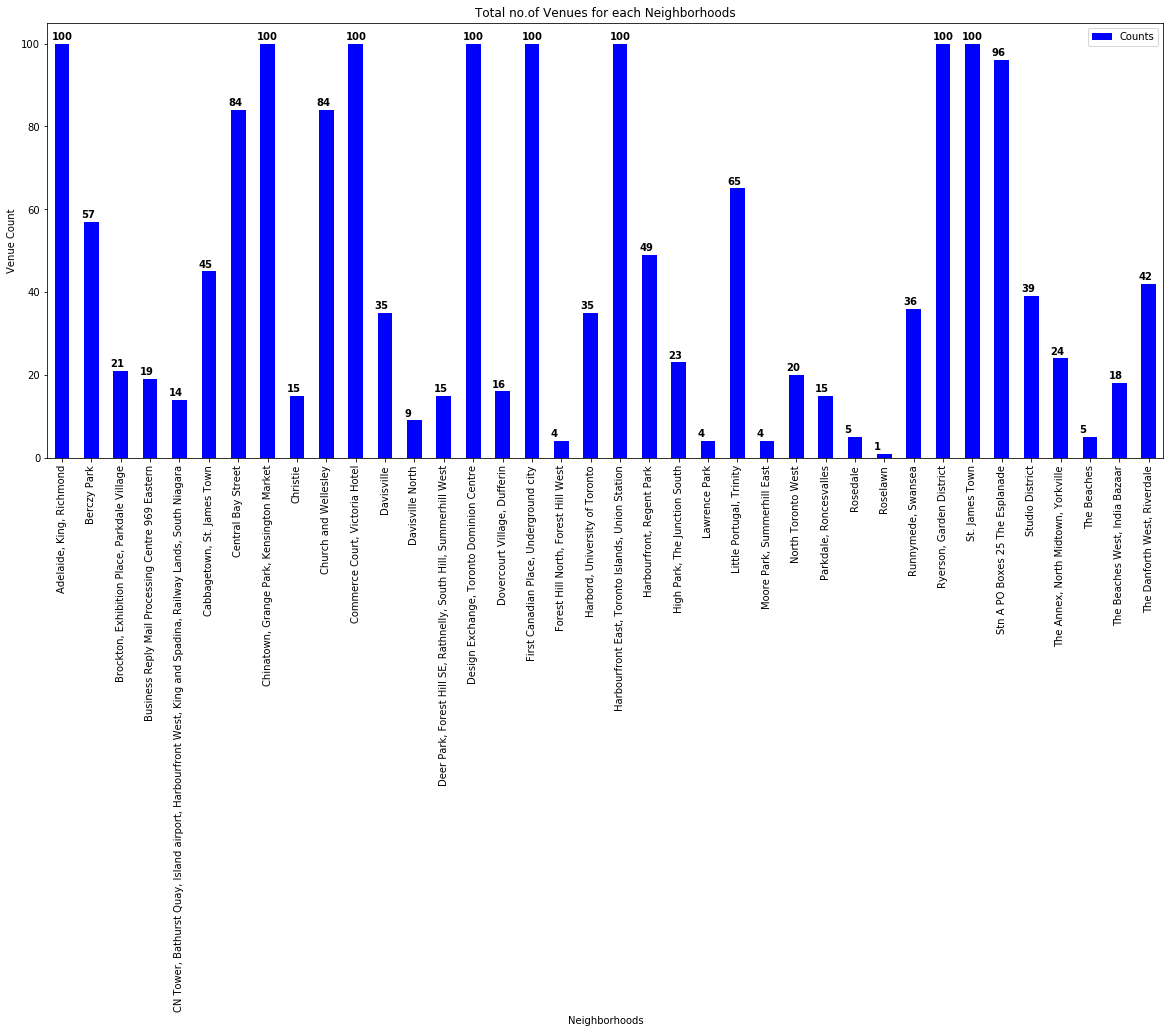

In [95]:
import matplotlib as mpl
import matplotlib.pyplot as plt
ax = TorontoGrouped.plot(kind = 'bar', stacked = 'false', figsize=(20,8), color='blue', width = 0.5)

for bar in ax.patches:
    ax.text(bar.get_x()-.1, bar.get_height()+1, str(int(bar.get_height())), color='black', fontweight='bold')
plt.xlabel('Neighborhoods')
plt.ylabel('Venue Count')
plt.title('Total no.of Venues for each Neighborhoods')
plt.show()

#### Let's find out how many unique categories can be curated from all the returned venues

In [37]:
print('There are {} uniques categories.'.format(len(TorontoVenues['Venue Category'].unique())))

There are 239 uniques categories.


## 3. Analyze Each Neighborhood

In [38]:
# one hot encoding
TorontoOnehot = pd.get_dummies(TorontoVenues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
TorontoOnehot['Neighborhood'] = TorontoVenues['Neighborhood'] 

# move neighborhood column to the first column
cols=list(TorontoOnehot.columns.values)
cols.pop(cols.index('Neighborhood'))
TorontoOnehot=TorontoOnehot[['Neighborhood']+cols]

# rename Neighborhood for Neighbourhood so that future merge works
TorontoOnehot.rename(columns = {'Neighborhood': 'Neighbourhood'}, inplace = True)
TorontoOnehot.head()

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [39]:
TorontoOnehot.shape

(1699, 239)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [40]:
TorontoGrouped = TorontoOnehot.groupby('Neighbourhood').mean().reset_index()
print(TorontoGrouped.shape)
TorontoGrouped.head()

(38, 239)


,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,"Adelaide, King, Richmond",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.03,0.0,...,0.0,0.0,0.0,0.010000,0.0,0.0,0.0,0.01,0.01,0.000000
1,Berczy Park,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.017544,0.0,0.0,0.0,0.00,0.00,0.000000
2,"Brockton, Exhibition Place, Parkdale Village",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.000000
3,Business Reply Mail Processing Centre 969 Eastern,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.052632
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.0,0.071429,0.071429,0.071429,0.142857,0.142857,0.142857,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.000000


#### Let's confirm the new size

In [41]:
TorontoGrouped.shape

(38, 239)

#### Let's print each neighborhood along with the top 5 most common venues

In [42]:
num_top_venues = 5

for hood in TorontoGrouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = TorontoGrouped[TorontoGrouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
             venue  freq
0      Coffee Shop  0.08
1             Café  0.05
2              Bar  0.04
3  Thai Restaurant  0.04
4       Steakhouse  0.04


----Berczy Park----
                venue  freq
0         Coffee Shop  0.09
1        Cocktail Bar  0.05
2      Farmers Market  0.04
3  Seafood Restaurant  0.04
4            Beer Bar  0.04


----Brockton, Exhibition Place, Parkdale Village----
            venue  freq
0     Coffee Shop  0.10
1            Café  0.10
2  Breakfast Spot  0.10
3      Restaurant  0.05
4    Climbing Gym  0.05


----Business Reply Mail Processing Centre 969 Eastern----
                venue  freq
0  Light Rail Station  0.11
1         Yoga Studio  0.05
2                Park  0.05
3          Comic Shop  0.05
4    Recording Studio  0.05


----CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara----
              venue  freq
0    Airport Lounge  0.14
1   Airport Service  0.14
2  Ai

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [43]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [44]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = TorontoGrouped['Neighbourhood']

for ind in np.arange(TorontoGrouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(TorontoGrouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Thai Restaurant,Bar,Steakhouse,Breakfast Spot,Gym,Asian Restaurant,Hotel,American Restaurant
1,Berczy Park,Coffee Shop,Cocktail Bar,Steakhouse,Seafood Restaurant,Beer Bar,Café,Cheese Shop,Farmers Market,Bakery,Concert Hall
2,"Brockton, Exhibition Place, Parkdale Village",Breakfast Spot,Coffee Shop,Café,Italian Restaurant,Pet Store,Climbing Gym,Restaurant,Caribbean Restaurant,Burrito Place,Stadium
3,Business Reply Mail Processing Centre 969 Eastern,Light Rail Station,Yoga Studio,Garden Center,Farmers Market,Smoke Shop,Fast Food Restaurant,Brewery,Park,Burrito Place,Spa
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Lounge,Airport Service,Airport Terminal,Plane,Airport,Airport Food Court,Airport Gate,Coffee Shop,Harbor / Marina,Sculpture Garden


## 4. Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [45]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = TorontoGrouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [46]:
toronto_merged = TorontoData

# add clustering labels
toronto_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Trail,Pub,Health Food Store,Coffee Shop,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Yoga Studio
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0,Greek Restaurant,Coffee Shop,Italian Restaurant,Ice Cream Shop,Furniture / Home Store,Yoga Studio,Bookstore,Brewery,Bubble Tea Shop,Burger Joint
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,0,Pizza Place,Sushi Restaurant,Ice Cream Shop,Italian Restaurant,Liquor Store,Fish & Chips Shop,Fast Food Restaurant,Movie Theater,Park,Pet Store
3,M4M,East Toronto,Studio District,43.659526,-79.340923,0,Café,Coffee Shop,Italian Restaurant,Bakery,American Restaurant,Yoga Studio,Convenience Store,Brewery,Seafood Restaurant,Sandwich Place
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0,Park,Bus Line,Dim Sum Restaurant,Swim School,Yoga Studio,Donut Shop,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market


Finally, let's visualize the resulting clusters

In [47]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


## 5. Examine Clusters

#### Cluster 0

In [48]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,The Beaches,0,Trail,Pub,Health Food Store,Coffee Shop,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Yoga Studio
1,"The Danforth West, Riverdale",0,Greek Restaurant,Coffee Shop,Italian Restaurant,Ice Cream Shop,Furniture / Home Store,Yoga Studio,Bookstore,Brewery,Bubble Tea Shop,Burger Joint
2,"The Beaches West, India Bazaar",0,Pizza Place,Sushi Restaurant,Ice Cream Shop,Italian Restaurant,Liquor Store,Fish & Chips Shop,Fast Food Restaurant,Movie Theater,Park,Pet Store
3,Studio District,0,Café,Coffee Shop,Italian Restaurant,Bakery,American Restaurant,Yoga Studio,Convenience Store,Brewery,Seafood Restaurant,Sandwich Place
4,Lawrence Park,0,Park,Bus Line,Dim Sum Restaurant,Swim School,Yoga Studio,Donut Shop,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market
5,Davisville North,0,Sandwich Place,Clothing Store,Dog Run,Breakfast Spot,Hotel,Gym,Park,Dance Studio,Food & Drink Shop,Dumpling Restaurant
6,North Toronto West,0,Coffee Shop,Clothing Store,Sporting Goods Shop,Yoga Studio,Furniture / Home Store,Dessert Shop,Diner,Rental Car Location,Restaurant,Chinese Restaurant
7,Davisville,0,Pizza Place,Sandwich Place,Dessert Shop,Italian Restaurant,Café,Restaurant,Coffee Shop,Sushi Restaurant,Thai Restaurant,Pharmacy
8,"Moore Park, Summerhill East",0,Playground,Gym,Park,Restaurant,Dive Bar,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant
9,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",0,Coffee Shop,Pub,American Restaurant,Sushi Restaurant,Restaurant,Bagel Shop,Sports Bar,Supermarket,Liquor Store,Light Rail Station


#### Cluster 1

In [49]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Stn A PO Boxes 25 The Esplanade,1,Coffee Shop,Restaurant,Café,Seafood Restaurant,Italian Restaurant,Cocktail Bar,Beer Bar,Hotel,Lounge,Farmers Market


#### Cluster 2

In [50]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,"The Annex, North Midtown, Yorkville",2,Café,Sandwich Place,Coffee Shop,Pizza Place,Indian Restaurant,Park,Liquor Store,Jewish Restaurant,BBQ Joint,Pub
27,"CN Tower, Bathurst Quay, Island airport, Harbo...",2,Airport Lounge,Airport Service,Airport Terminal,Plane,Airport,Airport Food Court,Airport Gate,Coffee Shop,Harbor / Marina,Sculpture Garden


#### Cluster 3

In [51]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Central Bay Street,3,Coffee Shop,Ice Cream Shop,Italian Restaurant,Sandwich Place,Burger Joint,Café,Bakery,Bubble Tea Shop,Salad Place,Restaurant


#### Cluster 4

In [52]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Roselawn,4,Garden,Yoga Studio,Flower Shop,Fish Market,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space


# <center>Part B</center>

# 1. Download and Explore Dataset¶

In [53]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [54]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [55]:
neighborhoods_data = newyork_data['features']

In [56]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Tranform the data into a pandas dataframe

In [57]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [58]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [59]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [60]:
neighborhoods.head(10)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [61]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Use geopy library to get the latitude and longitude values of New York City.

In [62]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.

In [63]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [64]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


#### Now we create a map of Manhattan with neighborhoods superimposed on top.

In [65]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7900869, -73.9598295.


In [66]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [67]:
manhattan_data.loc[0, 'Neighborhood']

'Marble Hill'

In [68]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


In [69]:
LIMIT = 100 # limit of number of venues returned by Foursquare API



radius = 500 # define radius




url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=E0ZTYGA4VL5EDYJA0YEDG21DB5D2OUGBDICPTQNSHSBCVRBB&client_secret=THQD1CT5ITLZ14MVPAHX1ZAOCF0R1WML0R4GHFXPGCGAU2TT&v=20180605&ll=40.87655077879964,-73.91065965862981&radius=500&limit=100'

In [70]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d6133eb4eefd00025e4ec93'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Marble Hill',
  'headerFullLocation': 'Marble Hill, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 25,
  'suggestedBounds': {'ne': {'lat': 40.88105078329964,
    'lng': -73.90471933917806},
   'sw': {'lat': 40.87205077429964, 'lng': -73.91659997808156}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b4429abf964a52037f225e3',
       'name': "Arturo's",
       'location': {'address': '5198 Broadway',
        'crossStreet': 'at 225th St.',
        'lat': 40.87441177110231,
        'lng': -73.91027100981574,
        'labeledLatLngs': [{'label'

In [71]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Arturo's,Pizza Place,40.874412,-73.910271
1,Bikram Yoga,Yoga Studio,40.876844,-73.906204
2,Tibbett Diner,Diner,40.880404,-73.908937
3,Starbucks,Coffee Shop,40.877531,-73.905582
4,Dunkin',Donut Shop,40.877136,-73.906666


In [72]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

25 venues were returned by Foursquare.


# 2. Explore Neighborhoods in Manhattan

In [73]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [74]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3324, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


In [75]:
ManhattanGrouped = manhattan_venues.groupby('Neighborhood').size().reset_index(name = 'Counts').set_index("Neighborhood")
ManhattanGrouped

,Counts
Neighborhood,
Battery Park City,100
Carnegie Hill,100
Central Harlem,47
Chelsea,100
Chinatown,100
Civic Center,100
Clinton,100
East Harlem,44
East Village,100


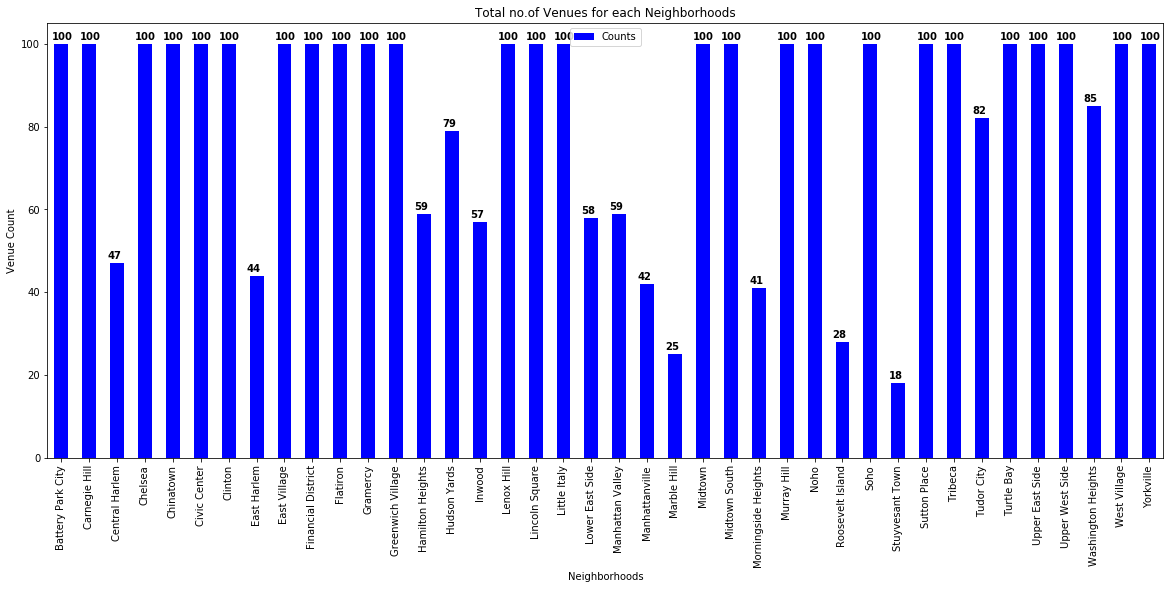

In [76]:
ax = ManhattanGrouped.plot(kind = 'bar', figsize = (20,8), color = 'blue', width = 0.5)

for bar in ax.patches:
    ax.text(bar.get_x()-.1, bar.get_height()+1, str(int(bar.get_height())), color = 'black', fontweight = 'bold')
plt.xlabel('Neighborhoods')
plt.ylabel('Venue Count')
plt.title('Total no.of Venues for each Neighborhoods')
plt.show()

In [77]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 341 uniques categories.


# 3. Analyze Each Neighborhood

In [78]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
manhattan_onehot.shape

(3324, 342)

In [80]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
print(manhattan_onehot.shape)
manhattan_grouped

(3324, 342)


,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Battery Park City,0.000000,0.00,0.00,0.00000,0.010000,0.00,0.00,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.00,0.010000,0.030000,0.000000,0.030000,0.000000
1,Carnegie Hill,0.000000,0.00,0.00,0.00000,0.010000,0.00,0.00,0.000000,0.010000,...,0.00,0.020000,0.00,0.000000,0.00,0.010000,0.030000,0.000000,0.010000,0.030000
2,Central Harlem,0.000000,0.00,0.00,0.06383,0.042553,0.00,0.00,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,Chelsea,0.000000,0.00,0.00,0.00000,0.030000,0.01,0.00,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.020000,0.000000,0.010000,0.000000
4,Chinatown,0.000000,0.00,0.00,0.00000,0.040000,0.00,0.00,0.000000,0.000000,...,0.00,0.040000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
5,Civic Center,0.000000,0.00,0.00,0.00000,0.030000,0.01,0.00,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.00,0.010000,0.020000,0.010000,0.000000,0.030000
6,Clinton,0.000000,0.00,0.00,0.00000,0.040000,0.00,0.00,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.00,0.020000,0.030000,0.000000,0.000000,0.000000
7,East Harlem,0.000000,0.00,0.00,0.00000,0.000000,0.00,0.00,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
8,East Village,0.000000,0.00,0.00,0.00000,0.020000,0.01,0.00,0.020000,0.010000,...,0.00,0.020000,0.00,0.000000,0.00,0.050000,0.010000,0.000000,0.000000,0.000000
9,Financial District,0.010000,0.00,0.00,0.00000,0.040000,0.00,0.00,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.00,0.010000,0.040000,0.000000,0.010000,0.000000


In [81]:
manhattan_grouped.shape

(40, 342)

In [82]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
            venue  freq
0            Park  0.08
1     Coffee Shop  0.07
2           Hotel  0.05
3   Memorial Site  0.04
4  Clothing Store  0.03


----Carnegie Hill----
            venue  freq
0     Coffee Shop  0.07
1     Pizza Place  0.06
2             Bar  0.04
3            Café  0.04
4  Cosmetics Shop  0.04


----Central Harlem----
                  venue  freq
0    African Restaurant  0.06
1  Gym / Fitness Center  0.04
2    Seafood Restaurant  0.04
3                   Bar  0.04
4    Chinese Restaurant  0.04


----Chelsea----
                venue  freq
0         Coffee Shop  0.06
1  Italian Restaurant  0.05
2      Ice Cream Shop  0.05
3              Bakery  0.04
4           Nightclub  0.04


----Chinatown----
                   venue  freq
0     Chinese Restaurant  0.09
1           Cocktail Bar  0.05
2    American Restaurant  0.04
3  Vietnamese Restaurant  0.04
4     Salon / Barbershop  0.04


----Civic Center----
                  venue  freq
0    Italian

In [83]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [84]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Memorial Site,Italian Restaurant,Wine Shop,Gym,Women's Store,Clothing Store,Playground
1,Carnegie Hill,Coffee Shop,Pizza Place,Cosmetics Shop,Bar,Café,French Restaurant,Japanese Restaurant,Grocery Store,Yoga Studio,Spa
2,Central Harlem,African Restaurant,Bar,Chinese Restaurant,Gym / Fitness Center,Seafood Restaurant,Public Art,Cosmetics Shop,Deli / Bodega,American Restaurant,Fried Chicken Joint
3,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Nightclub,Bakery,Hotel,American Restaurant,Seafood Restaurant,Art Gallery,Theater
4,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Bubble Tea Shop,Bakery,Spa,Ice Cream Shop,Dumpling Restaurant


# 4. Cluster Neighborhoods

In [85]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 1, 2, 1, 2, 2, 0, 1, 1], dtype=int32)

In [86]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,1,Sandwich Place,Coffee Shop,Discount Store,Yoga Studio,Diner,Steakhouse,Supplement Shop,Shopping Mall,Seafood Restaurant,Tennis Stadium
1,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,Cocktail Bar,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Bubble Tea Shop,Bakery,Spa,Ice Cream Shop,Dumpling Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,0,Café,Mobile Phone Shop,Bakery,Grocery Store,Supermarket,Deli / Bodega,Coffee Shop,Park,Clothing Store,Chinese Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,0,Mexican Restaurant,Café,Lounge,Pizza Place,Park,Bakery,Frozen Yogurt Shop,Deli / Bodega,Restaurant,Spanish Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Mexican Restaurant,Café,Pizza Place,Coffee Shop,Liquor Store,Indian Restaurant,Sushi Restaurant,Park,Deli / Bodega,Sandwich Place


In [87]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# 5. Examine Clusters¶

#### Cluster 0

In [88]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Washington Heights,Café,Mobile Phone Shop,Bakery,Grocery Store,Supermarket,Deli / Bodega,Coffee Shop,Park,Clothing Store,Chinese Restaurant
3,Inwood,Mexican Restaurant,Café,Lounge,Pizza Place,Park,Bakery,Frozen Yogurt Shop,Deli / Bodega,Restaurant,Spanish Restaurant
4,Hamilton Heights,Mexican Restaurant,Café,Pizza Place,Coffee Shop,Liquor Store,Indian Restaurant,Sushi Restaurant,Park,Deli / Bodega,Sandwich Place
5,Manhattanville,Italian Restaurant,Deli / Bodega,Park,Coffee Shop,Mexican Restaurant,Seafood Restaurant,Café,Bike Trail,Lounge,Sushi Restaurant
7,East Harlem,Mexican Restaurant,Bakery,Deli / Bodega,Pizza Place,Thai Restaurant,Latin American Restaurant,French Restaurant,Steakhouse,Spanish Restaurant,Seafood Restaurant
25,Manhattan Valley,Pizza Place,Indian Restaurant,Coffee Shop,Yoga Studio,Café,Mexican Restaurant,Thai Restaurant,Deli / Bodega,Playground,Bar
36,Tudor City,Café,Mexican Restaurant,Park,Pizza Place,Greek Restaurant,Sushi Restaurant,Deli / Bodega,Spanish Restaurant,Restaurant,Burger Joint


#### Cluster 1

In [89]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Sandwich Place,Coffee Shop,Discount Store,Yoga Studio,Diner,Steakhouse,Supplement Shop,Shopping Mall,Seafood Restaurant,Tennis Stadium
1,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Bubble Tea Shop,Bakery,Spa,Ice Cream Shop,Dumpling Restaurant
6,Central Harlem,African Restaurant,Bar,Chinese Restaurant,Gym / Fitness Center,Seafood Restaurant,Public Art,Cosmetics Shop,Deli / Bodega,American Restaurant,Fried Chicken Joint
9,Yorkville,Italian Restaurant,Bar,Coffee Shop,Gym,Pizza Place,Sushi Restaurant,Wine Shop,Ice Cream Shop,Mexican Restaurant,Deli / Bodega
10,Lenox Hill,Coffee Shop,Italian Restaurant,Sushi Restaurant,Pizza Place,Cosmetics Shop,Burger Joint,Gym,Gym / Fitness Center,Sporting Goods Shop,Thai Restaurant
12,Upper West Side,Italian Restaurant,Bar,Wine Bar,Mediterranean Restaurant,Cosmetics Shop,Coffee Shop,Vegetarian / Vegan Restaurant,Indian Restaurant,Bakery,Bookstore
16,Murray Hill,Coffee Shop,Sandwich Place,Hotel,Japanese Restaurant,Italian Restaurant,Gym / Fitness Center,Gym,French Restaurant,Bar,Sushi Restaurant
19,East Village,Bar,Wine Bar,Ice Cream Shop,Pizza Place,Chinese Restaurant,Mexican Restaurant,Cocktail Bar,Ramen Restaurant,Speakeasy,Coffee Shop
20,Lower East Side,Coffee Shop,Pizza Place,Café,Sandwich Place,Art Gallery,Bakery,Ramen Restaurant,Chinese Restaurant,Japanese Restaurant,Cocktail Bar
26,Morningside Heights,Park,Coffee Shop,American Restaurant,Bookstore,Food Truck,Tennis Court,Sandwich Place,Burger Joint,Deli / Bodega,Café


#### Cluster 2

In [90]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Upper East Side,Italian Restaurant,Exhibit,Art Gallery,Bakery,Coffee Shop,Gym / Fitness Center,Juice Bar,French Restaurant,Hotel,Spa
13,Lincoln Square,Gym / Fitness Center,Theater,Plaza,Café,Concert Hall,Italian Restaurant,Performing Arts Venue,Park,Opera House,Indie Movie Theater
14,Clinton,Theater,Gym / Fitness Center,Italian Restaurant,Hotel,American Restaurant,Wine Shop,Coffee Shop,Spa,Sandwich Place,Food Court
15,Midtown,Hotel,Coffee Shop,Theater,Clothing Store,Cocktail Bar,Sporting Goods Shop,Bakery,Bookstore,Spa,Japanese Restaurant
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Nightclub,Bakery,Hotel,American Restaurant,Seafood Restaurant,Art Gallery,Theater
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,Clothing Store,Seafood Restaurant,Indian Restaurant,Cosmetics Shop,Café,French Restaurant,Chinese Restaurant,Cocktail Bar
21,Tribeca,Italian Restaurant,Park,Café,American Restaurant,Spa,Boutique,Wine Bar,Gym,Greek Restaurant,Coffee Shop
22,Little Italy,Bakery,Café,Italian Restaurant,Sandwich Place,Bubble Tea Shop,Clothing Store,Salon / Barbershop,Mediterranean Restaurant,Ice Cream Shop,Women's Store
23,Soho,Clothing Store,Boutique,Women's Store,Art Gallery,Shoe Store,Italian Restaurant,Men's Store,Mediterranean Restaurant,Furniture / Home Store,Bakery
24,West Village,Italian Restaurant,Cosmetics Shop,New American Restaurant,Cocktail Bar,American Restaurant,Wine Bar,Park,Jazz Club,Coffee Shop,Bakery


#### Cluster 3

In [91]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Bar,Playground,Park,Pet Service,Farmers Market,Basketball Court,Baseball Field,Gas Station,Fountain,Harbor / Marina


#### Cluster 4

In [92]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Roosevelt Island,Park,Sandwich Place,Coffee Shop,Playground,Dry Cleaner,Plaza,Café,Farmers Market,Supermarket,Metro Station
